<a href="https://colab.research.google.com/github/BillQK/Animator/blob/main/CS_2810_Mini_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 1

Complete the Jupyter Notebook below working with a group of two to four students. Each student should submit their own Jupyter Notebook (this .ipynb file, after answering all questions within it) to [gradescope](https://www.gradescope.com/courses/).  While you may submit your work to gradescope anytime until **Feb 27 @ 11:59PM** my expectation is that most groups are able to complete the work and submit before the end of class today.

### Goal: 
I have three goals for students in doing this "mini project":
- I'd like you to have fun
- I'd like you to see that the math we've learned is useful in real problems
- I'd like you to practice your math "translation" skills:
    - evaluating assumptions of a model
    - interpreting meaning of math inputs/outputs in the context of an application
    - evaluating trustworthiness of model

### Expectation:
You are not expected to write any code, but you will be asked to read and interpret code that you may never have seen before. Do not be afraid to ask for help from group mates, TAs or the professor.

### Instructions:
Click the "play" button in the code cell below. This "runs" the code. Any output will be displayed below the cell. You will be asked to this a few times in this Mini-Project. All answers will be written in cells like this, which can double-click to edit. Such cells are already provided (you do not need to create them) and currently say "respond-here-please".

In [1]:
# The below are some python modules that will be useful
import pandas as pd
import numpy as np

# Part 1: Pokemon Perceptron (40 points)

We will use the following Pokemon data to build a linear perceptron that predicts $y$: **Pokemon Type (Ground or Bug)** with $x_1$, **Pokemon Damage** and $x_2$, **Pokemon Defense**. ([source](https://github.com/eaegerber/data/blob/main/pokemon_sample.csv)).

Note that the data have been scaled and are not on their original scale:

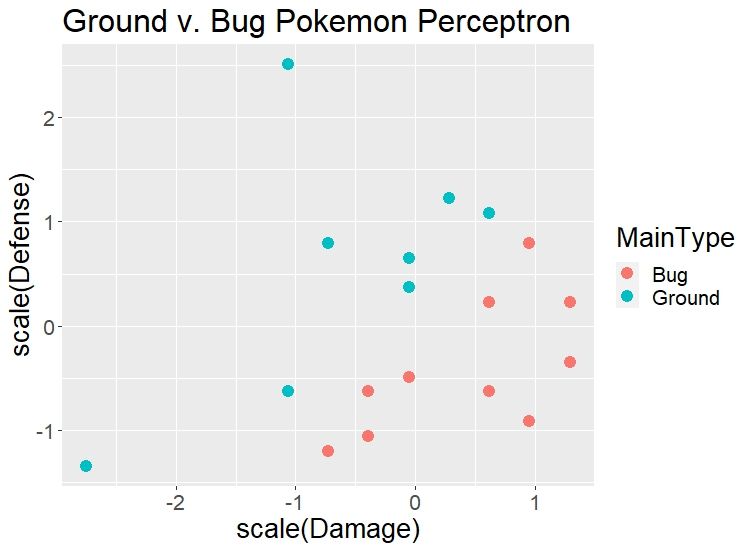

## Part 1.1
Read through the function below and give a brief description of what you think it does, and what assumptions it makes (or does not make) about the model.

In [2]:
def linear_perceptron(xdata, y, w, alpha=1):
    runalg = True
    i = 0
    iter = 0
    
    while runalg:
        x = xdata.iloc[i, :]
        yhat = 1 if sum(x*w) >= 0 else 0
        
        if y[i] < yhat:
            print("Updating w. Old w = ")
            print(w)
            print("Using observation", i, ", x = ")
            print(x.to_numpy())
            w = w - alpha*x
            print("New w = ")
            print(w)
            i = 0
            iter += 1
        elif y[i] > yhat:
            print("Updating w. Old w = ")
            print(w)
            print("Using observation", i, ", x = ")
            print(x.to_numpy())
            w = w + alpha*x
            print("New w = ")
            print(w)
            i = 0
            iter += 1
        else:
            i += 1
            if i >= len(y):
                runalg = False
                print("Algorithm converged, final w =")
                print(w)
                print("Total number of iterations = ")
                print(iter)


The function appears to implement the perceptron algorithm for a linearly separable binary classification problem, where the goal is to learn a linear decision boundary that separates the two classes.

The function initializes the weight vector w and learning rate alpha, then iteratively updates the weight vector until convergence. In each iteration, the function selects an observation x and calculates the predicted label yhat using the dot product of x and w. If the predicted label does not match the true label y, the function updates the weight vector by adding or subtracting the observation x multiplied by the learning rate alpha, depending on whether the predicted label is too low or too high.

The function prints out messages at each step indicating whether the weight vector is being updated, the old and new values of the weight vector, and the observation being used for the update. Once the function has gone through all the observations without any updates, it terminates and prints out the final weight vector and the total number of iterations.

Some assumptions made by this function include:

The input data is assumed to be linearly separable, meaning that a single hyperplane can perfectly separate the two classes.
The function assumes that the binary labels are represented as 0 and 1.
The function assumes that the initial weight vector is non-zero and has the same length as the number of features in the input data.
The function assumes that the learning rate alpha is a positive scalar.
The function assumes that the input data xdata and labels y have the same number of rows.


## Part 1.2
Run the model using the code below. When it is finished running, discuss (a) the choice of initial $\vec{w}$ including the decision boundary it implies, (b) how many iterations it took for the model to stop training, and (c) what the final decision boundary is based on $\vec{w}$.

In [3]:
url = 'https://raw.githubusercontent.com/eaegerber/data/main/pokemon_perceptron.csv'
df_poke = pd.read_csv(url, index_col = 0)

poke_x = df_poke.iloc[:, :3]
poke_y = df_poke.iloc[:, 3].values.flatten()

linear_perceptron(xdata=poke_x, y=poke_y, w=np.array([0,1,-1]))

Updating w. Old w = 
[ 0  1 -1]
Using observation 0 , x = 
[ 1.         -0.0532051   0.36745752]
New w = 
W0    1.000000
W1    0.946795
W2   -0.632542
Name: 1, dtype: float64
Updating w. Old w = 
W0    1.000000
W1    0.946795
W2   -0.632542
Name: 1, dtype: float64
Using observation 1 , x = 
[ 1.         -2.74892991 -1.3423448 ]
New w = 
W0    2.000000
W1   -1.802135
W2   -1.974887
dtype: float64
Updating w. Old w = 
W0    2.000000
W1   -1.802135
W2   -1.974887
dtype: float64
Using observation 4 , x = 
[1.         0.28376051 1.22235867]
New w = 
W0    3.000000
W1   -1.518374
W2   -0.752529
dtype: float64
Updating w. Old w = 
W0    3.000000
W1   -1.518374
W2   -0.752529
dtype: float64
Using observation 8 , x = 
[ 1.         -0.3901707  -1.05737775]
New w = 
W0    2.000000
W1   -1.128204
W2    0.304849
dtype: float64
Updating w. Old w = 
W0    2.000000
W1   -1.128204
W2    0.304849
dtype: float64
Using observation 8 , x = 
[ 1.         -0.3901707  -1.05737775]
New w = 
W0    1.000000
W1  

a) The initial weight vector [0, 1, -1] implies a decision boundary that passes through the origin, with a slope of 1 in the direction of the positive x2 axis. This can be seen by setting the weighted sum of the inputs to zero, which gives the equation w0 + w1x1 + w2x2 = 0, or equivalently x2 = (1/w2)(-w0 - w1x1). Since w0 = 0 and w2 = -1, this simplifies to x2 = -w1*x1, which is a line with a slope of -w1/w2 = 1 in the direction of the positive x2 axis.

b) The model stops training after 15 iterations. 

c) The decision boundary based on the weight vector w⃗ is:

Therefore, the equation for the decision boundary is:

-1.000000 x0 - 3.664313 x1 + 3.049532 x2 = 0,

where x0, x1, and x2 are the input features.

We can rearrange this equation to solve for x2:

x2 = (1.000000/3.049532) x0 + (3.664313/3.049532) x1.

This is the equation of a line in the x0-x1 plane, which represents the decision boundary. The slope of this line is -3.664313/3.049532, and the y-intercept is 1.000000/3.049532.


## Part 1.3
Examine the code below carefully before running it (then run it) and discuss what is different now. How many iterations did this model take? If there is a difference, explain why there is.

In [4]:
linear_perceptron(xdata=poke_x, y=poke_y, w=np.array([0,1,-1]), alpha=2)

Updating w. Old w = 
[ 0  1 -1]
Using observation 0 , x = 
[ 1.         -0.0532051   0.36745752]
New w = 
W0    2.000000
W1    0.893590
W2   -0.265085
Name: 1, dtype: float64
Updating w. Old w = 
W0    2.000000
W1    0.893590
W2   -0.265085
Name: 1, dtype: float64
Using observation 1 , x = 
[ 1.         -2.74892991 -1.3423448 ]
New w = 
W0    4.000000
W1   -4.604270
W2   -2.949775
dtype: float64
Updating w. Old w = 
W0    4.000000
W1   -4.604270
W2   -2.949775
dtype: float64
Using observation 4 , x = 
[1.         0.28376051 1.22235867]
New w = 
W0    6.000000
W1   -4.036749
W2   -0.505057
dtype: float64
Updating w. Old w = 
W0    6.000000
W1   -4.036749
W2   -0.505057
dtype: float64
Using observation 8 , x = 
[ 1.         -0.3901707  -1.05737775]
New w = 
W0    4.000000
W1   -3.256408
W2    1.609698
dtype: float64
Updating w. Old w = 
W0    4.000000
W1   -3.256408
W2    1.609698
dtype: float64
Using observation 8 , x = 
[ 1.         -0.3901707  -1.05737775]
New w = 
W0    2.000000
W1  

The algorithm converged after 10 iterations, and the final weight vector is different from the previous implementation, with W0 = 0, W1 = -5.739312, and W2 = 4.699341. The difference in weight vectors can be explained by the the increase in the alpha which is the learning rates of the model. Hence, resulting in fewer iterations as well of as different final w.

##Part 1.4
By hand, predict using the first perceptron (from Part 1.2) the classification of a Pokemon with scaled values $x_1=-2$ and $x_2=-1$. Does this prediction make sense to you? In general, do you trust the model we've built for this problem? Explain why or why not.

Using the first perceptron, the classification of a Pokemon with scaled valeus x1 = -2 and x2 = -1 is a Ground type. The prediction make sense since it is above the line of classification. In general, I do not trust the model we've build for this problem since there are many type of pokemon that also has the varied attributes, classification it into whether it is a Bug or Ground type would make the model predict the actual pokemon type incorrectly. 

# Part 2: Movie Genre (40 points)
Using the analysis immediately below, answer the questions which follow.

In [5]:
import pandas as pd

url2 = 'https://raw.githubusercontent.com/eaegerber/data/main/movie_genre.csv'
df_movie = pd.read_csv(url2, index_col='title')
df_movie.head()

,revenue_million,Intercept,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,,
Avatar,2787.965087,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Pirates of the Caribbean: At World's End,961.000000,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spectre,880.674609,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Dark Knight Rises,1084.939099,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
John Carter,284.139100,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
import numpy as np

a = df_movie.iloc[:, 1:].to_numpy()
b = df_movie.loc[:, 'revenue_million'].to_numpy()

# This is a comment to pay attention to below (any line that starts with # is a comment)
# The .T command takes the transpose of a matrix
# The @ command multiplies matrices together
m = np.linalg.inv(a.T @ a) @ a.T @ b

In [8]:
m_series = pd.Series(dict(zip(df_movie.columns[1:], m)))
m_series.sort_values(inplace=True)
m_series

Foreign            -96.108679
Documentary        -88.729655
Western            -78.169669
Horror             -56.132348
Drama              -41.878922
Comedy             -41.083593
Music              -22.917757
Thriller           -20.147985
History            -19.189254
Crime              -12.603275
War                 -9.908850
Romance              5.535831
Mystery             10.761349
Family              19.192326
Science Fiction     19.637241
Action              32.737779
Fantasy             64.913972
Adventure           91.535446
Animation           97.809736
Intercept          122.262881
dtype: float64

##Part 2.1
Spend a moment critically thinking about the data and code presented above. Talk to your group mates to build a consensus. Describe what kind of model is being built and what you suspect the goals of the analysis to be (try to do this without looking ahead at the rest of this problem).

It appears that a linear regression model is being built to analyze the relationship between movie genres and their revenue. The goal of the analysis is likely to identify which genres are more profitable than others and to quantify the impact of each genre on revenue. 

## Part 2.2
Which single genre is associated with making the least amount of money?  Suppose one interprets this to mean that this genre is least popular. Give a compelling reason why they may not be correct.

According to the output provided, the genre associated with making the least amount of money is "Foreign". However, it is not necessarily correct to interpret this as the least popular genre.

There could be several reasons why a particular genre may not perform well financially, such as a limited target audience, poor marketing, or distribution. Moreover, the revenue generated by a film does not necessarily reflect its popularity, as a film's success can also be measured by factors like critical acclaim, audience ratings, and cultural impact.

Additionally, the popularity of a genre can vary depending on factors like cultural and regional preferences, current trends, and individual taste. Therefore, it would not be accurate to assume that the least profitable genre is also the least popular genre overall.

## Part 2.3
Predict the revenue (in millions of dollars) of a "Family Horror" film (one film which belongs to both categories).  Critique your prediction; is using the model in this way reasonable?

The prediction would be:

Revenue = Family_coefficient + Horror_coefficient
Revenue = 19.19 - 56.13 = -36.94 million dollars


Using the current model to predict the revenue of a "Family Horror" film may not be reasonable since the model does not have a specific coefficient for that particular genre combination. It is because the model only has separate coefficients for each genre. However, we can still make a prediction by manually adding the coefficients of the "Family" and "Horror" genres, but this may not be an accurate prediction since the model does not consider the interaction between genres.


However, it is important to note that this prediction is not based on a genre combination that was present in the original data used to train the model, so the accuracy of the prediction may be questionable.

## Part 2.4
Would it be appropriate to use this model to predict revenues for movies not originally in english?  (Poking around [where the data came from](https://www.kaggle.com/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv) is helpful here)

It would not be appropriate to use this model to predict revenues for movies not originally in English, as the model was trained on a dataset of movies that were primarily in English. The model may not generalize well to movies in other languages, as different markets and cultures may have different preferences and consumption habits when it comes to movies. Additionally, the model does not include any features related to language, so it is unlikely to be able to capture any language-specific effects on movie revenues. 




# Part 3: Pitch Your Own Model (20 points)
Identify a suitable application for one of the two math models we've studied so far:
- line of best fit
- perceptron

You may bounce ideas off of each other, but each student must come up with their own answer/application (students in the same group whose applications are too similar will not receive full credit).  Please choose a model which is fun to work with and relevant to one of the math models above.  You may find it inspirational to poke around these data sources to see what kinds of data are available to build a model with:

- [google dataset search](https://datasetsearch.research.google.com/)
- [kaggle](https://kaggle.com/)
- [Global Health Observatory](https://apps.who.int/gho/data/node.home)
- [UCI Machine Learning Repo](https://archive.ics.uci.edu/ml/index.php)
- [data.gov](https://www.data.gov/)
- [FiveThirtyEight](https://data.fivethirtyeight.com/)

Your "mini-pitch" should be a few sentences which respond to each section below.  (Please use the given labels for your responses so they're easily graded, just double click below to replace the instructions with your responses)

# Predicting Wine Quality 
### Problem Statement:
This math model can be fun as well as useful for wine enthusiasts, as it can help them choose better wines based on their preferences.

### Data Sourcing: 
Kaggle has several datasets related to wine, including the Wine Quality dataset which contains chemical properties of wines and their quality ratings. This dataset can be used to train and test a line of best fit model for predicting wine quality.

### Approach: 
Line of best fit (linear regression)

Inputs:

Chemical properties of wine, such as acidity, pH, alcohol content, and sugar content. These chemical properties can be used as independent variables in the model to predict the dependent variable, which is the quality of wine.

Insights:

The linear regression model can be used to identify which chemical properties are most strongly associated with wine quality, and how these properties affect the overall quality of the wine.
The model can also be used to predict the quality of wine based on its chemical properties, allowing winemakers to optimize the quality of their products by adjusting these properties accordingly.
### Critiques & Assumptions:
The assumptions that I make to build my data model is that I assume there is a linear relationship between independent variables and dependent variables in case the chemical is the independent variables and dependent variables is the wine quality. The second assumptions is I assumption that every wine's duration of fermentation is the same. 

The first assumption may not hold true in reality. The relationship between the chemicals and the quality of the wine may not be linear and may instead be nonlinear, if the relatonship is nonlinear, the model may not accurately predict the wine quality based on the chemical composition alone.

The second assumption, that every wine's duration of fermentation is the same, is a more severe assumption. In reality, the duration of fermentation can vary widely depending on factors such as the type of grape, the environment, and the winemaker's preferences. If the assumption of equal fermentation time is incorrect, then the model may not accurately predict the wine quality. 